In [5]:
cd MK

C:\Users\zangs\Documents\repo\SPM\motif_disc\MK


In [7]:
cd "Database Version"

C:\Users\zangs\Documents\repo\SPM\motif_disc\MK\Database Version


# understand the behavior of MK motif discovery algorithm running on Windows

Database Version: this data set (d.txt) has 1000 time series, each of dimension 1024. From this, we understand that the "database" version means there is a database of pre-extracted time-series. With the "subsequence" version, you have a long time series and you have to extract subsequences and doing motif discovery. 

Here is readme:

FILE = Name of the ascii text file that contains the database of time series.

m = number of time series

n = length of individual time series 

R = number of reference points

v = 0 for suppressing the statistics(default) / 1 for printing the statistics

A = 0 for NOT using Early Abandonning / 1 for using Early Abandonning(default)



Usage for mk_d:
===============

mk_d.exe FILE m n R [V]


Sample command for mk_d:
------------------------

mk_d.exe d.txt 1000 1024 10 1




Usage for BF_d:
===============

BF_d.exe FILE m n [A | A V]


Sample commands for BF_d:
------------------------

BF_d.exe d.txt 1000 1024 0 1

BF_d.exe d.txt 1000 1024 1


Notes:
******

1. The output statistics may not be appeared correctly in 32 bit processors. For 64 bit processors it is guaranteed to give correct output.
2. The motif pair will be output irrespective of the platform.
3. To Compile the codes any version of gcc should be fine.
4. Please report bugs to mueen@cs.ucr.edu

In [41]:
f=open('d.txt','r').read().split('\n')
tsd=[]
for line in f:
    if line!='':
        l=line.split(" ")
        tsd.append(l[1:])
    

In [42]:
len(tsd[0])

1024

In [43]:
tsdf=[]
for line in tsd:
    lf=[float(i) for i in line]
    tsdf.append(lf)

In [32]:
%matplotlib inline

In [33]:
import matplotlib.pyplot as plt

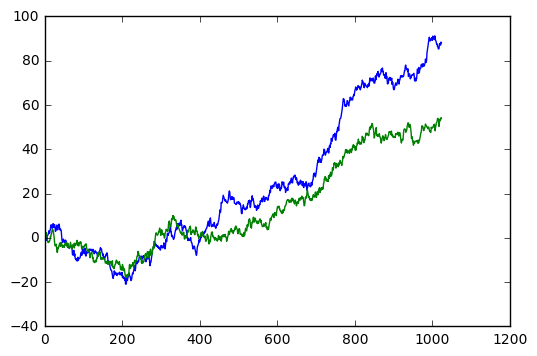

In [44]:
#plot some ts: these two are found to be top motif by the algo
plt.plot(tsdf[230])
plt.plot(tsdf[777])



In [45]:
len(tsdf[1])

1024

# subsequence mode

In [47]:
cd "../Subsequence version"

C:\Users\zangs\Documents\repo\SPM\motif_disc\MK\Subsequence version


In [48]:
ls

 Volume in drive C has no label.
 Volume Serial Number is CEE9-8BD1

 Directory of C:\Users\zangs\Documents\repo\SPM\motif_disc\MK\Subsequence version

11/07/2016  09:14 AM    <DIR>          .
11/07/2016  09:14 AM    <DIR>          ..
11/07/2016  09:14 AM             6,881 BF_l.cpp
11/07/2016  09:14 AM            31,028 BF_l.exe
11/07/2016  09:14 AM            12,037 mk_l.cpp
11/07/2016  09:14 AM           597,884 mk_l.exe
11/07/2016  09:14 AM             1,056 Readme.txt
11/07/2016  09:14 AM           180,000 s.txt
               6 File(s)        828,886 bytes
               2 Dir(s)  164,169,302,016 bytes free


In [53]:
tss=open('s.txt','r').read().split('\n')[:-1]


In [54]:
len(tss)

10000

In [55]:
tssf=[float(i) for i in tss]

In [56]:
tssf[:10]

[-7615.0635,
 -7691.8154,
 -7664.5298,
 -7657.415,
 -7647.1948,
 -7637.3833,
 -7628.8066,
 -7623.9624,
 -7617.1494,
 -7607.0859]

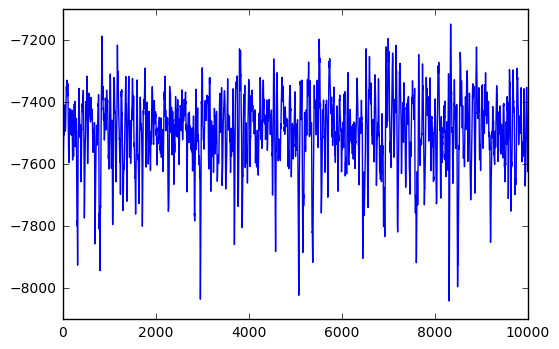

In [57]:
plt.plot(tssf)